Regression analysis as we know is about analysing the relationship between a dependent variable and one or more independent variables. We will consider a simple example where we have a sample of data points ($x_i, y_i$), with i = 1,...,n and we have to find a relationship between the variables ($y_i = \alpha_i x_i + \alpha_0$),

where $\alpha_0$ is the intercept and $\alpha$ is known as slope. 

## Understanding Gradient Descent

Generate some random data and add some gaussian noise to it

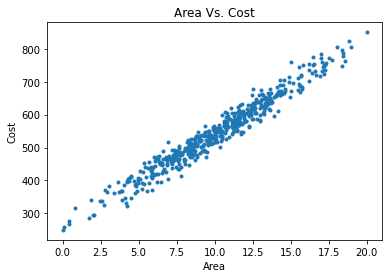

In [26]:
import pandas as pd
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

x, y, coef = datasets.make_regression(n_samples=500,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

x = np.interp(x, (x.min(), x.max()), (0, 20))
y = np.interp(y, (y.min(), y.max()), (250, 850))

plt.ion() #interactive plot on
plt.plot(x,y,'.',label='training data')
plt.xlabel('Area');plt.ylabel('Cost')
plt.title('Area Vs. Cost')

data = pd.DataFrame(data={'area':x.flatten(),'cost':y})

In [27]:
X = data[['area']]
y = data[['cost']]

## Use Linear Regression to find the respective coefficients

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X,y)

LinearRegression()

In [4]:
print("The slope is:    ", lr.coef_[0])
print("The intercept is:", lr.intercept_)

The slope is:     [28.67328977]
The intercept is: [255.92844457]


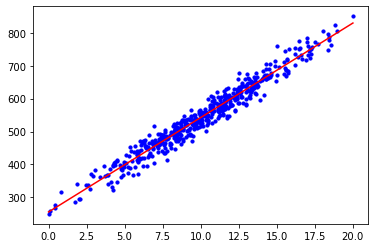

In [5]:
x_fit = np.linspace(0,20,100)
y_fit = lr.predict(x_fit[:, np.newaxis])
plt.scatter(X,y, color = 'blue',s=10)
plt.plot(x_fit,y_fit, color = "red")
plt.show()

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions


<b>Cost</b>
\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \beta x_i + \alpha_i)^2
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial}{\partial \alpha} = -\frac{2}{n}\sum_{i=1}^{n}(y_i-( \beta x_i +\alpha))
\end{equation}

\begin{equation}
\frac{\partial}{\partial \beta} = -\frac{2}{n}\sum_{i=1}^{n}x_i (y_i-( \beta x_i +\alpha))
\end{equation}


<b>Gradients</b>
\begin{equation}
\alpha: = \alpha -\eta . \frac{\partial}{\partial \alpha}
\end{equation}
\begin{equation}
\beta: = \beta -\eta . \frac{\partial}{\partial \beta}
\end{equation}

 $y = \alpha + \beta X$

In [28]:
n = float(len(X))

X = X.to_numpy()
y = y.to_numpy()

In [14]:
cur_alpha = 2.0
cur_beta = 1.0

lr = 0.001 # the learning rate
epochs = 100000 # the number of iterations to perform gradient descent
precision = 0.0001 #This tells us when to stop the algorithm
previous_step_size_alpha = 1 #
previous_step_size_beta = 1 #
iters = 0 #iteration counter

In [15]:
arr_iters=[]
arr_cost=[]
arr_alpha=[]
arr_beta=[]
while (previous_step_size_alpha and previous_step_size_beta) > precision and iters < epochs:
    prev_alpha = cur_alpha #Store current x value in prev_x
    prev_beta = cur_beta #Store current x value in prev_x
    
    y_pred = prev_alpha + prev_beta*X
    d_alpha = -(2/n) * sum(y-y_pred)
    d_beta = -(2/n)* sum(X * (y-y_pred))
    cur_alpha = cur_alpha - lr * d_alpha
    cur_beta = cur_beta - lr * d_beta
    costfunc = 1/n * sum ((y - y_pred)**2)


    previous_step_size_alpha = abs(cur_alpha - prev_alpha) #Change in alpha
    previous_step_size_beta = abs(cur_beta - prev_beta) #Change in beta
    iters = iters+1 #iteration count
#    print("Iteration",iters,"\nX value is",cur_alpha, cur_beta) #Print iterations
    arr_iters.append(iters)
    arr_cost.append(costfunc)
    arr_alpha.append(cur_alpha)
    arr_beta.append(cur_beta)
    
print("The local minimum occurs at alpha:{},beta:{}, with {} iterations".format(cur_alpha, cur_beta,iters))
print("The cost function is ", costfunc)

The local minimum occurs at alpha:[251.02079739],beta:[29.1052367], with 16974 iterations
The cost function is  [497.34320034]


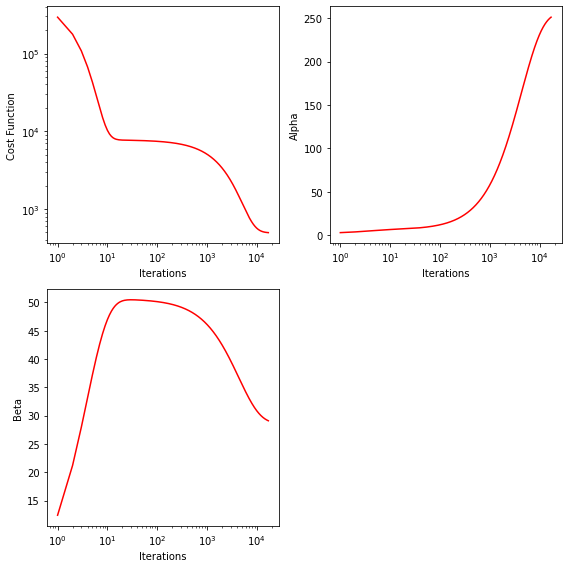

In [24]:
##plot1: Lets plot the cost history over iterations
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.plot(arr_iters,arr_cost,color='red')
plt.xscale("log")
plt.yscale("log")
plt.ylabel('Cost Function')
plt.xlabel('Iterations')

#plot 2: value of alpha with iteration
plt.subplot(2, 2, 2)
plt.plot(arr_iters,arr_alpha,color='red')
plt.xscale("log")
plt.ylabel('Alpha')
plt.xlabel('Iterations')
#plot 3: value of beta with iteration
plt.subplot(2, 2, 3)
plt.plot(arr_iters,arr_beta,color='red')
plt.xscale("log")
plt.ylabel('Beta')
plt.xlabel('Iterations')
plt.tight_layout()

plt.show()

## Exploring more about Gradient Descent

### Generating some random data, with $\alpha$ = 4, $\beta$ = 3, and add some gaussian noise to it

In [33]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

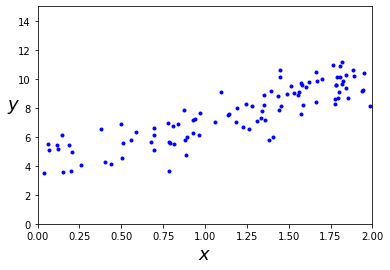

In [34]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

In [53]:
def grad_descent(epochs, lr,ax,ax1=None):
    cur_alpha = 3.0
    cur_beta =  1.0
    n=len(X)
    _ = ax.plot(X,y,'b.')
#    plt.scatter(X,y,c='r',marker='s',s=10)
    tr =0.1
    for i in range(epochs):
        prev_alpha = cur_alpha #Store current x value in prev_x
        prev_beta = cur_beta #Store current x value in prev_x
    
        y_pred = prev_alpha + prev_beta*X
        costfunc = 1/n * sum ((y- y_pred)**2)

        if ((i % 25 == 0) ):
            _ = ax.plot(X,y_pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
        if not ax1== None:
            _ = ax1.plot(i,costfunc,'b.')  
 #       plt.plot(X,y_pred,color='green',alpha=0.1)
        d_alpha = -(2/n) * sum(y-y_pred)
        d_beta = -(2/n)* sum(X * (y-y_pred))
        cur_alpha = cur_alpha - lr * d_alpha
        cur_beta = cur_beta - lr * d_beta

### Plot the graphs for different iterations and learning rates combination

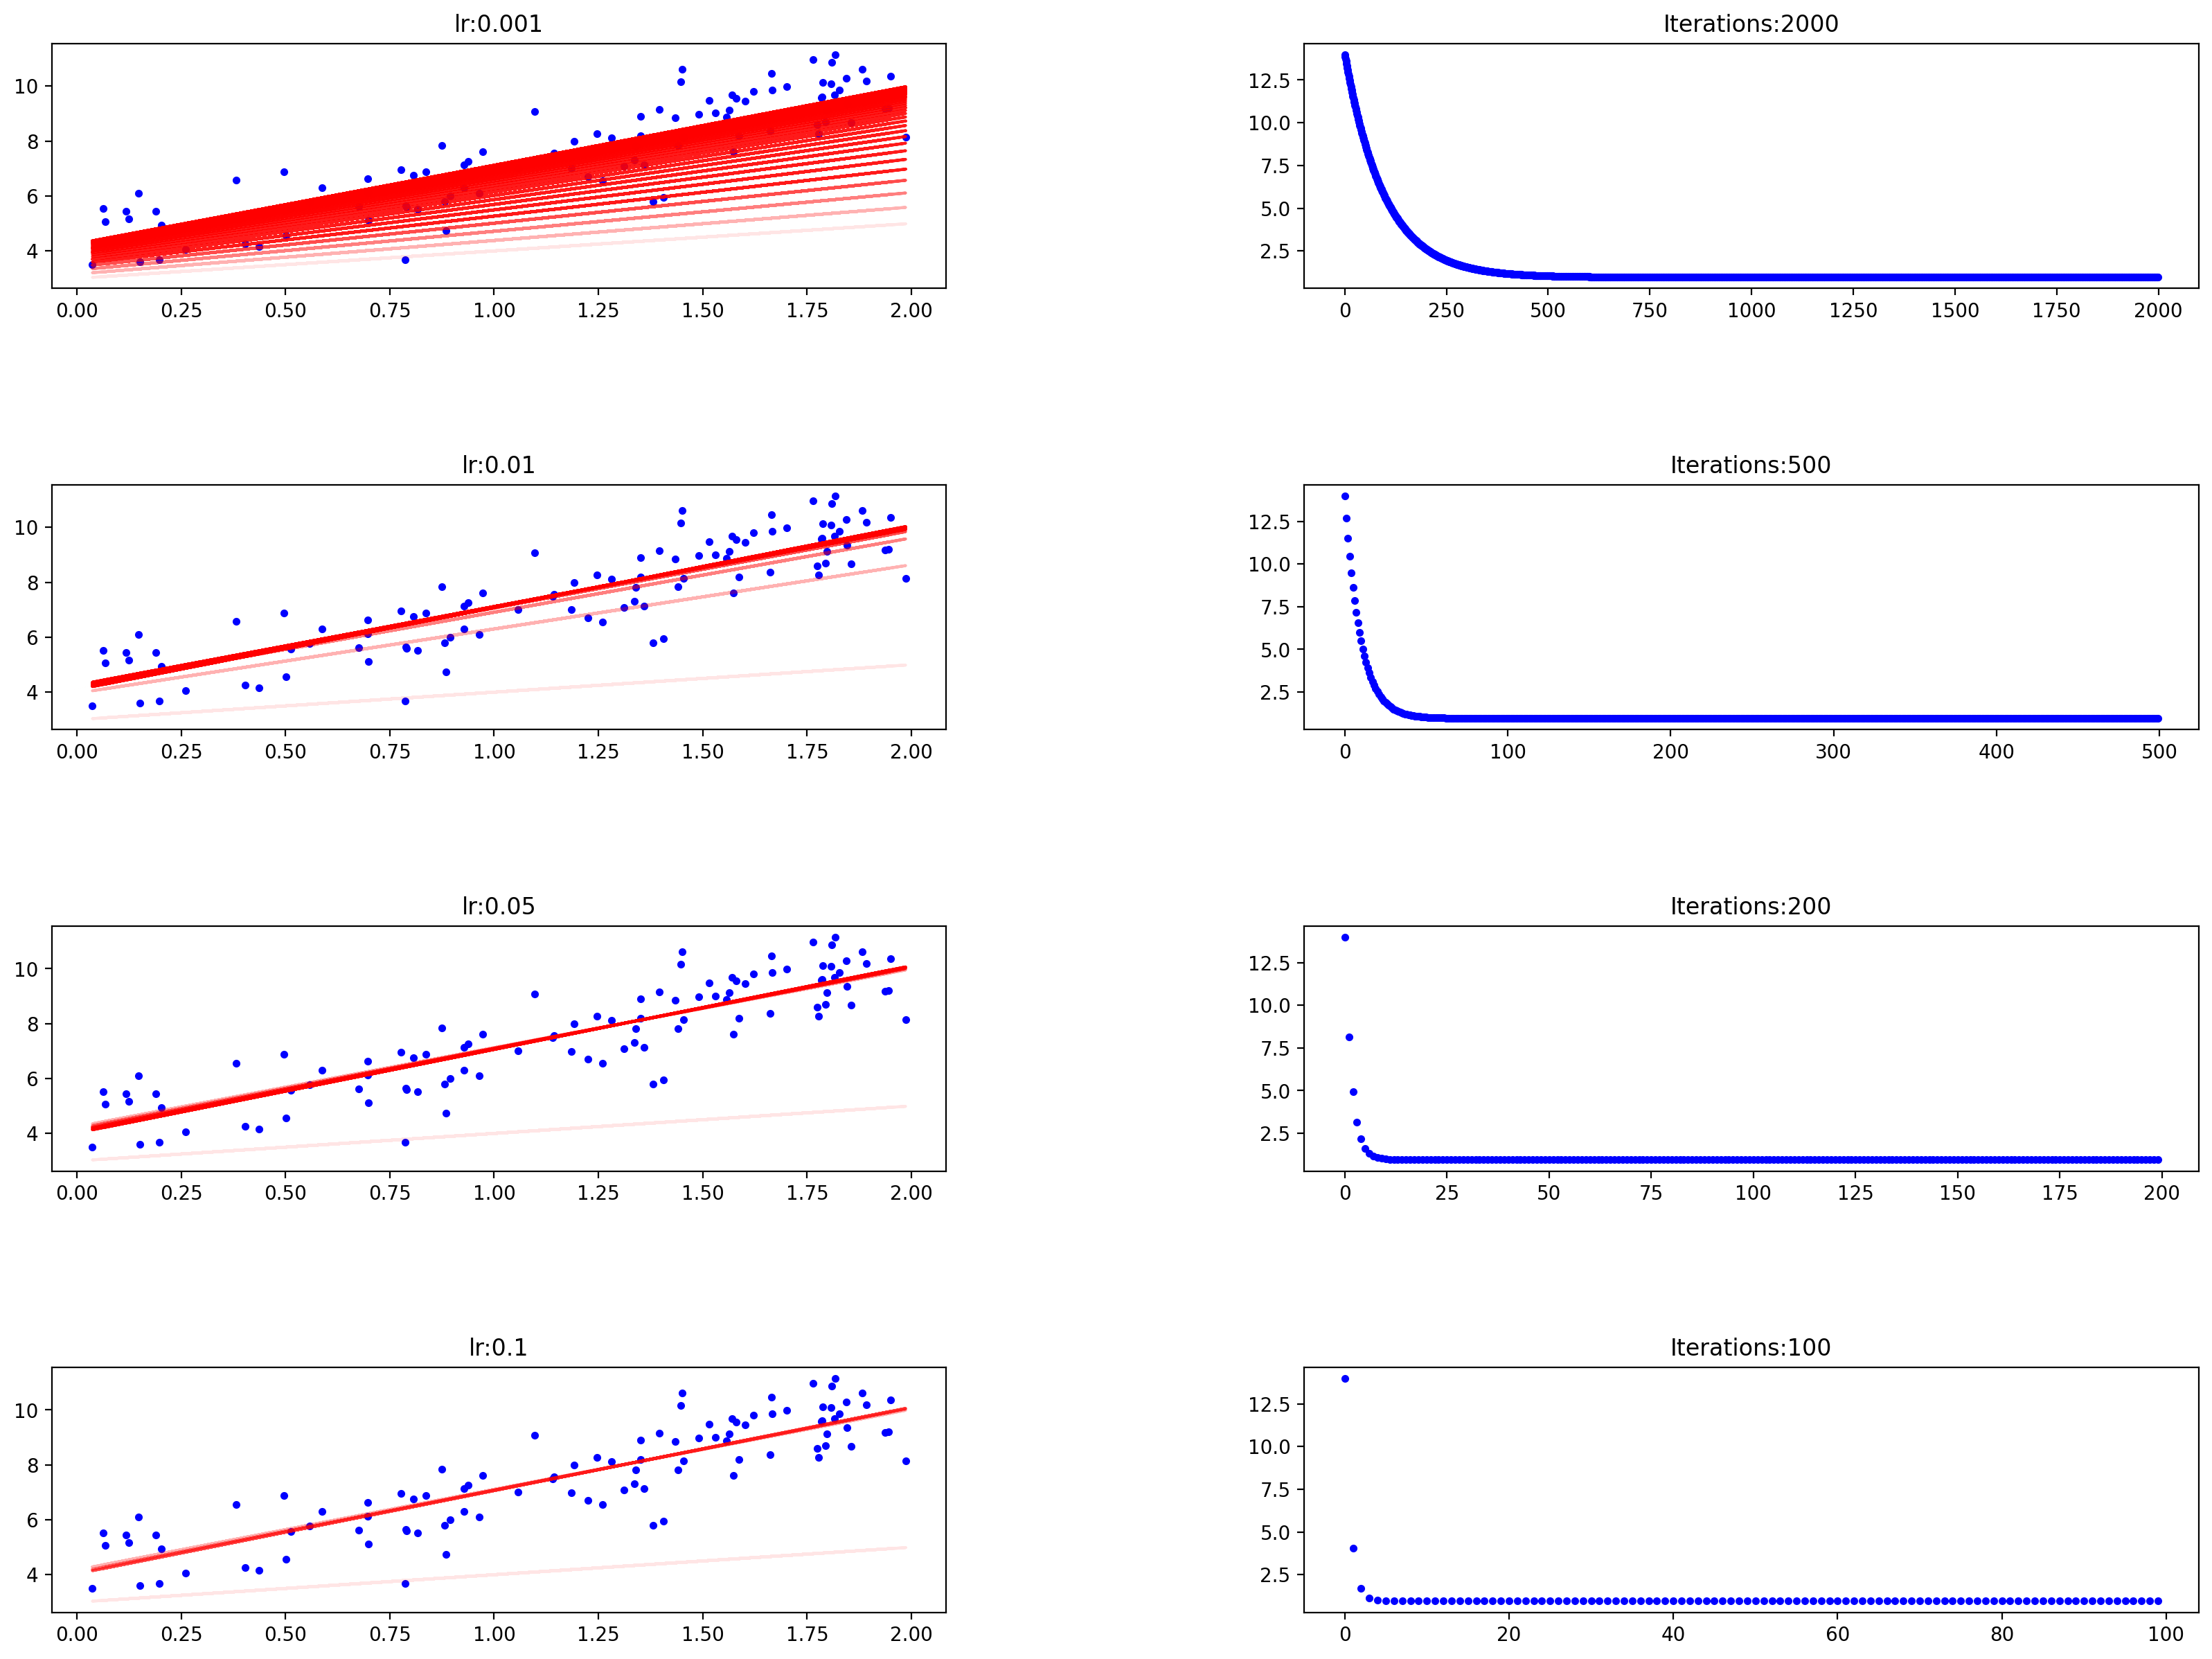

In [55]:
fig = plt.figure(figsize=(20,15),dpi=200)
fig.subplots_adjust(hspace=0.8, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    grad_descent(n_iter,lr,ax,ax1)

<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

## You can always plot Indiviual graphs to zoom in

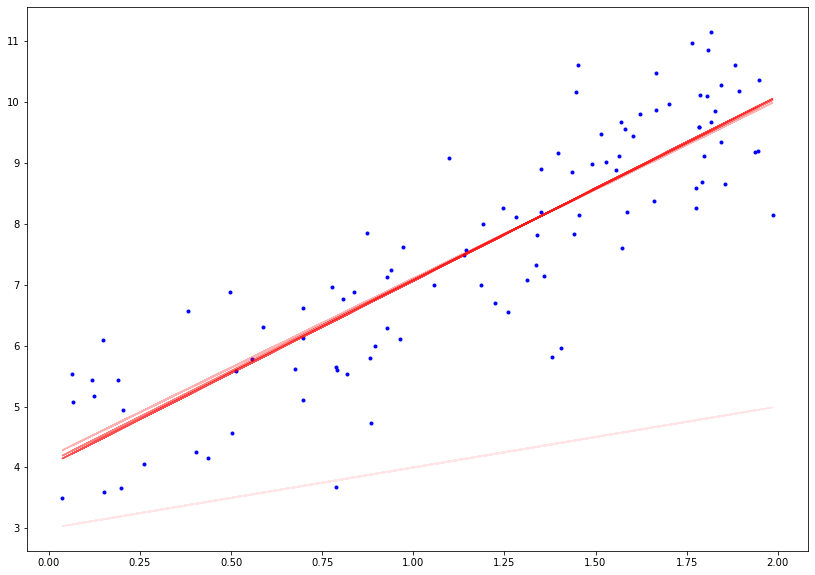

In [56]:
_,ax = plt.subplots(figsize=(14,10))
grad_descent(100,0.1,ax)